use the kaggle dataset to train

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

# Output directory to clear
output_dir = "/Users/25yoon/PycharmProjects/final_project/combined_files"

# Clear the contents of the output directory
shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Contents of {output_dir} cleared.")

Contents of /Users/25yoon/PycharmProjects/final_project/combined_files cleared.


In [6]:
import librosa
import soundfile as sf

# Path to the dataset
dataset_path = "/Users/25yoon/PycharmProjects/final_project/16000_pcm_speeches"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of speakers
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

# Number of files to combine for each speaker
num_files_to_combine = 120

# Iterate over each speaker's folder
for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    # List the first num_files_to_combine WAV files in the speaker's folder
    wav_files = [f"{i}.wav" for i in range(num_files_to_combine)]

    # Combine all WAV files into a single long file
    combined_audio = []
    for wav_file in wav_files:
        wav_file_path = os.path.join(speaker_folder_path, wav_file)
        audio, sr = librosa.load(wav_file_path, sr=None)
        combined_audio.extend(audio)

    # Save the combined audio file
    output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
    sf.write(output_file_path, combined_audio, sr)

print("Combination complete. Combined files saved in:", output_dir)



Combination complete. Combined files saved in: /Users/25yoon/PycharmProjects/final_project/combined_files


In [7]:
from IPython.display import display, Audio
#IPython is an interactive package commandline thing 
# Function to play audio file
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Play a specific combined audio file
speaker_folder = "Benjamin_Netanyau_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)

Click the play button to listen: /Users/25yoon/PycharmProjects/final_project/combined_files/Benjamin_Netanyau_combined.wav


/var/folders/rh/n4s19pkn29l6mv1g8w0glmsm0000gq/T/ipykernel_73066/1412572384.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


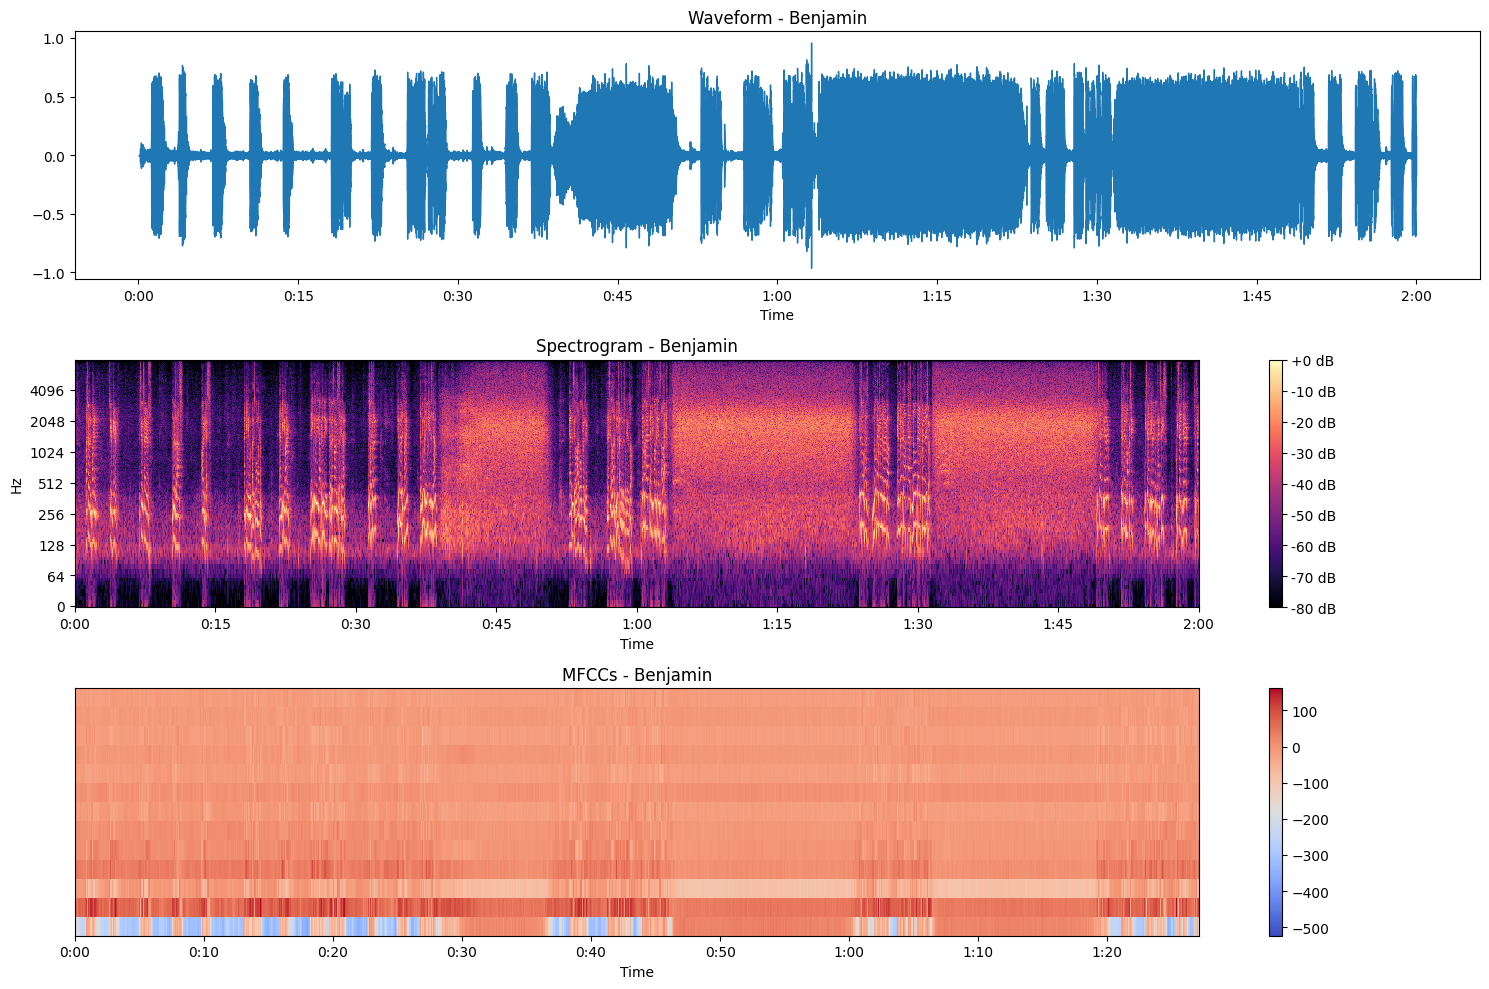

/var/folders/rh/n4s19pkn29l6mv1g8w0glmsm0000gq/T/ipykernel_73066/1412572384.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


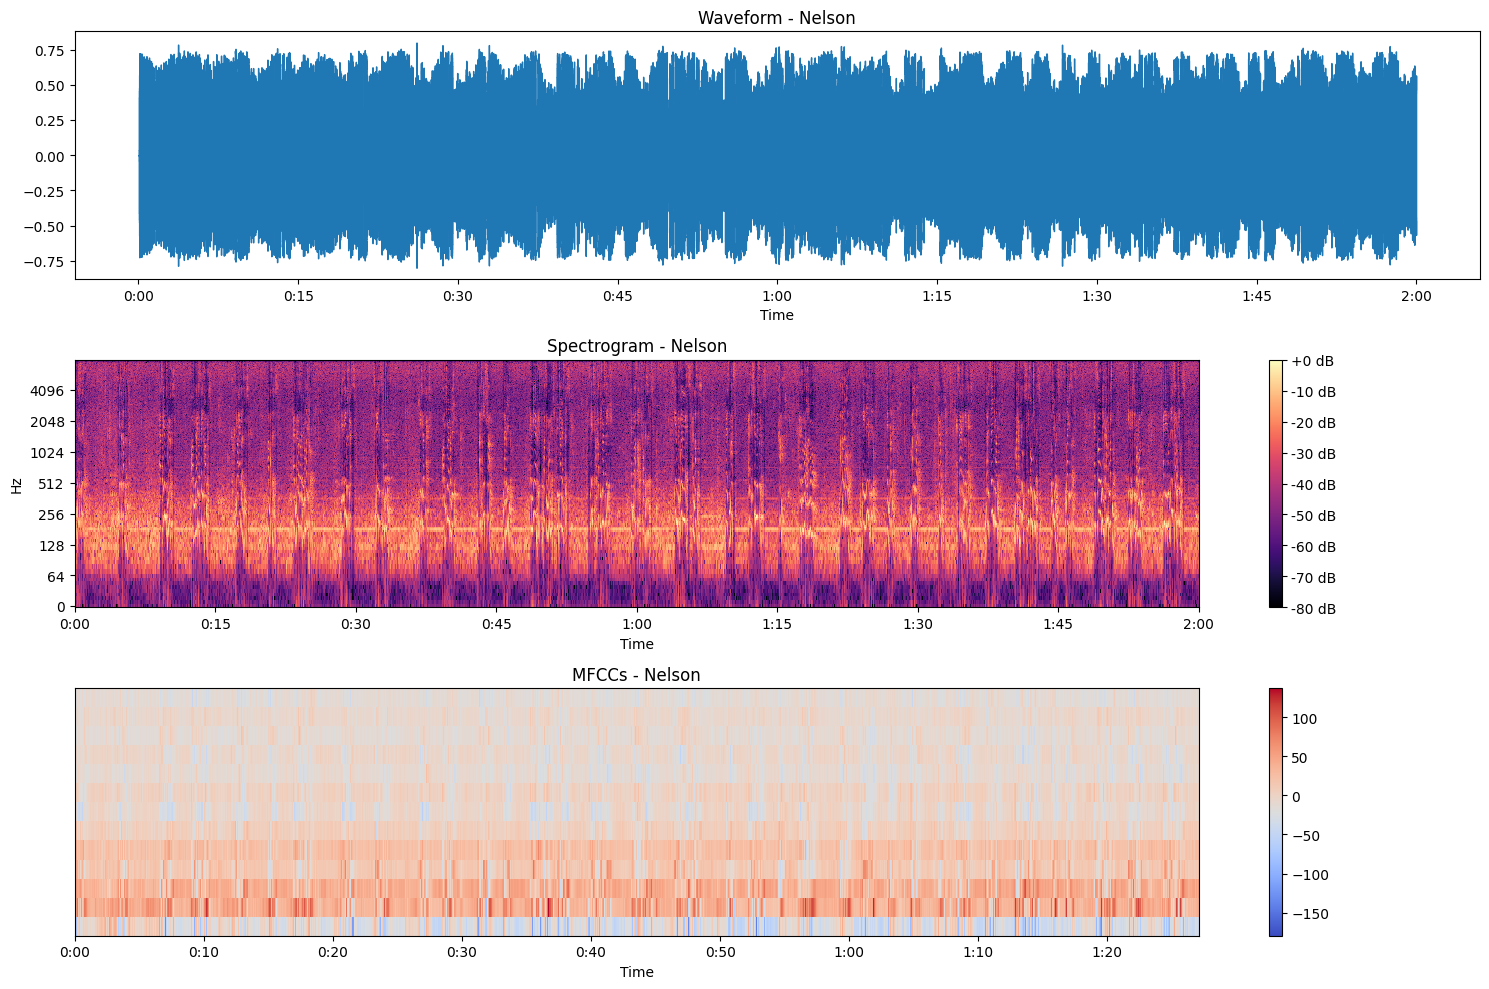

In [9]:
import librosa.display

# Function to plot the waveform, spectrogram, and MFCCs
def plot_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract speaker name from the file path
    speaker_name = os.path.basename(audio_path).split('_')[0]

    # Plot the waveform
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    # Plot the spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')
    
    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

# Paths to the combined audio files
audio_paths = [
    '/Users/25yoon/PycharmProjects/final_project/combined_files/Benjamin_Netanyau_combined.wav',
    '/Users/25yoon/PycharmProjects/final_project/combined_files/Nelson_Mandela_combined.wav'
]

# Plot features for each audio file
for audio_path in audio_paths:
    plot_audio_features(audio_path)
